<h1>Reading the dataset</h1>
<p>Let’s view our data and interpret the attributes in the dataset.</p>

<h2>Step 1: Importing Basic Libraries</h2>

In [311]:
#import pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

<h2>Step 2: Reading The Dataset</h2>
<p>Reading excel file in a pandas dataframe and view the head() of our dataframe.

In [312]:
#Reading bank loan data from an external excel file
bankloan = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name = 'Data')

#view few row of data
bankloan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<h2>Step 3: Viewing the columns’ info</h2>

In [313]:
#Overview of bank loan data: number of row, number of features, Non-null count and data types
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<p>We have a total of 14 attributes:</p>
<ul>
<li>Dtype int64 (integer): 13 attributes</li>
<li>Dtype float64 (float): 1 attribute</li>
</ul>

<h2>Step 4: View some quick statistical measures for the continuous attributes</h2>
<p>These attributes include:</p>
<ul>
<li>Age</li>
<li>CCAvg</li>
<li>Income</li>
</ul>

In [ ]:
#Statistic description of numerical variables
bankloan[['Age', 'Income', 'CCAvg']].describe()

,Age,Income,CCAvg
count,5000.000000,5000.000000,5000.000000
mean,45.338400,73.774200,1.937913
std,11.463166,46.033729,1.747666
min,23.000000,8.000000,0.000000
25%,35.000000,39.000000,0.700000
50%,45.000000,64.000000,1.500000
75%,55.000000,98.000000,2.500000
max,67.000000,224.000000,10.000000


<p>We can conclude:<p>
<ul>
<li>The average age of 45 years with a deviation of 11 years.</li>
<li>The average income of 73,000$ with the maximum applicant with 224,000$ for income.</li>
<li>75% of the customers have an income of less than 98,000$.</li>
<li>Average credit card spending of 1900$.</li>
</ul>

<h2>Step 5: Quick Measures with Filters</h2>
<p>It might be helpful to understand the behavior of those who previously applied for a loan to target those. So, we filter for those who accepted the personal loan in the last campaign (Personal_Loan = 1).<p>

In [315]:
#Statistics of those who previously applied for a loan
bankloan[bankloan['Personal Loan'] == 1][['Age', 'Income', 'CCAvg']].describe()

,Age,Income,CCAvg
count,480.000000,480.000000,480.000000
mean,45.066667,144.745833,3.905347
std,11.590964,31.584429,2.097679
min,26.000000,60.000000,0.000000
25%,35.000000,122.000000,2.600000
50%,45.000000,142.500000,3.800000
75%,55.000000,172.000000,5.350000
max,65.000000,203.000000,10.000000


<p>We can conclude:<p>
<ul>
<li>144000$ is the avarage income of the customers that accepted the personal loan in the last campaign with 31000 standard deviation.</li>
<li>60000$ is the minimum income of the customers that accepted the personal loan in the last campaign.</li>
<li>3900 is the average credit card spending of the customers that accepted the personal loan in the last campaign.</li>
<li>75% of the customers that accepted the personal loan in the last campaign have an average credit card spending greater than 2600$ and an income greater than 122000$.</li>
<li>50% of the customers that accepted the personal loan in the last campaign have income in [122000, 142500]</li>
</ul>

<h1>Data Cleaning</h1>
<p>We will have to deal with missing values, duplicate values, or unneeded columns. Also, we use the zip codes dataset to merge the county names to the original dataframe.<p>

<h2>1. Dealing with Missing Values</h2>

<h3>Step 1: Find the Missing Values in the attributes</h3>

In [ ]:
#Check if there are missing values in each column
bankloan.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<p>Missing Values:</p>
<ul><li>There is no missing value in data</li></ul>

<h2>2. Dealing with Duplicate Values</h2>

In [ ]:
#ID column should not have duplicated values
sum(bankloan.duplicated(subset=['ID']))

0

<p>Duplicated Values:</p>
<ul><li>There is no duplicated value in ID feature</li></ul>

<h1>Data Preparation</h1>

<h2>Step 1: Drop Unneeded columns</h2>

In [ ]:
#removing ID, it does not have any impact on our result
bankloan.drop(['ID'], axis = 1, inplace=True)

#check if ID column is dropped
bankloan.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


<h2>Step 2: Read and View the Zip code data</h2>

In [319]:
#reading zip code
zipcode = pd.read_csv('ZIP_county.csv')

#View zip code data
zipcode.head()

,ZIP Code,County Name
0,36003,Autauga County
1,36006,Autauga County
2,36067,Autauga County
3,36066,Autauga County
4,36703,Autauga County


<h2>Step 3: Check if the new Zip code exist in bank loan data</h2>

In [320]:
#Check if new zip codes in part of zip codes in bank loan
len(bankloan[(bankloan['ZIP Code'] <= 36703) & (bankloan['ZIP Code'] >= 36003)])

0

<p>The new zip codes do not exist in bank loan</p>

<h2>Step 4: Check for inconscistent values in bank loan data</h2>

In [321]:
#bank loan statistics
bankloan.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<p>Inconsistent values:</p>
<ul><li>negative values in "Experience" feature are inconscistents</li></ul>

<h2>Step 5:Filter conscistent values related to "Experience" feature</h2>

In [322]:
#We keep only data where year of 'Experience' are greater or equal to zero
bankloan = bankloan[bankloan['Experience'] >= 0]

#Check if filter is done correctly
bankloan[['Experience']].describe()

,Experience
count,4948.000000
mean,20.331043
std,11.311973
min,0.000000
25%,10.750000
50%,20.000000
75%,30.000000
max,43.000000


<h1>EDA on Numerical columns</h1>
<p>Numerical columns include Age, income, Experience, and CCAvg columns.</p>

<h2>Step 1: Find Histogram Distribution of Attribute</h2>

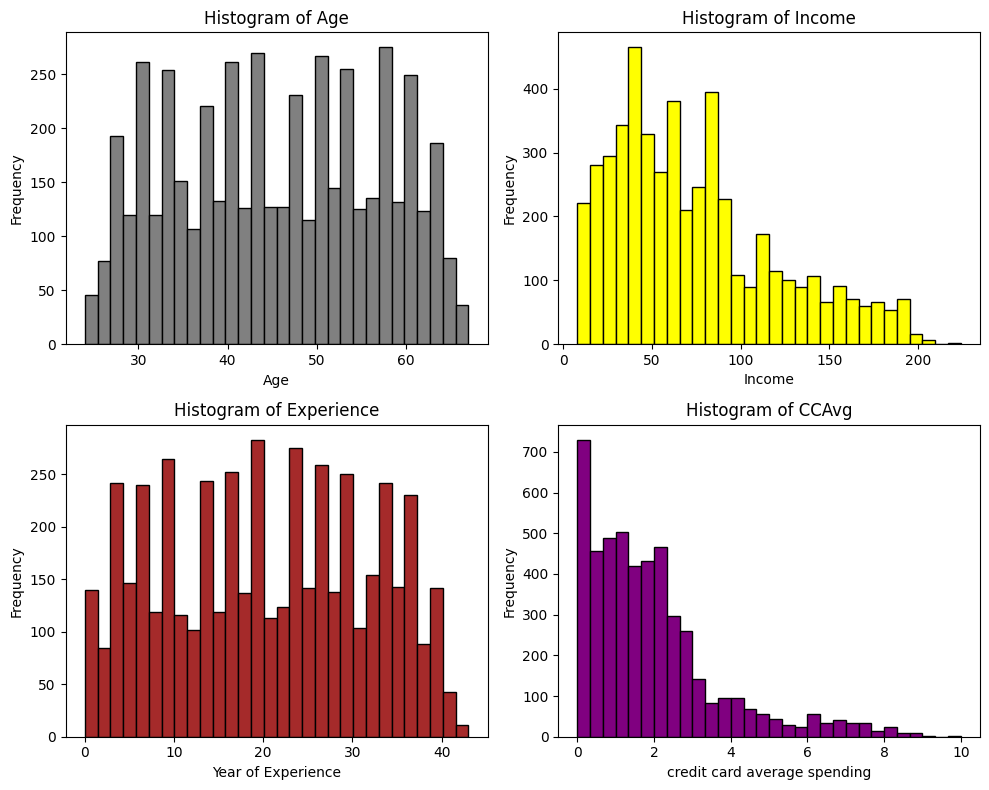

In [323]:
# Create a figure and axis object with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Plot histograms for each variable
axes[0, 0].hist(bankloan['Age'], bins=30, color='grey', edgecolor='black')
axes[0, 0].set_title('Histogram of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist( bankloan['Income'], bins=30, color='yellow', edgecolor='black')
axes[0, 1].set_title('Histogram of Income')
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(bankloan['Experience'], bins=30, color='brown', edgecolor='black')
axes[1, 0].set_title('Histogram of Experience')
axes[1, 0].set_xlabel('Year of Experience')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(bankloan['CCAvg'], bins=30, color='purple', edgecolor='black')
axes[1, 1].set_title('Histogram of CCAvg')
axes[1, 1].set_xlabel('credit card average spending')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<p>We can conclude:</p>
<ul>
<li>Income variable is Right Skewed: small number of costumenrs earn significantly more than the majority.</li>
<li>CCAvg variable is Right Skewed: small number of costumenrs spend significantly on credit card more than the majority</li>
</ul>

<h2>Step 2: Box Plot for the 5 point summary and the outliers if any</h2>

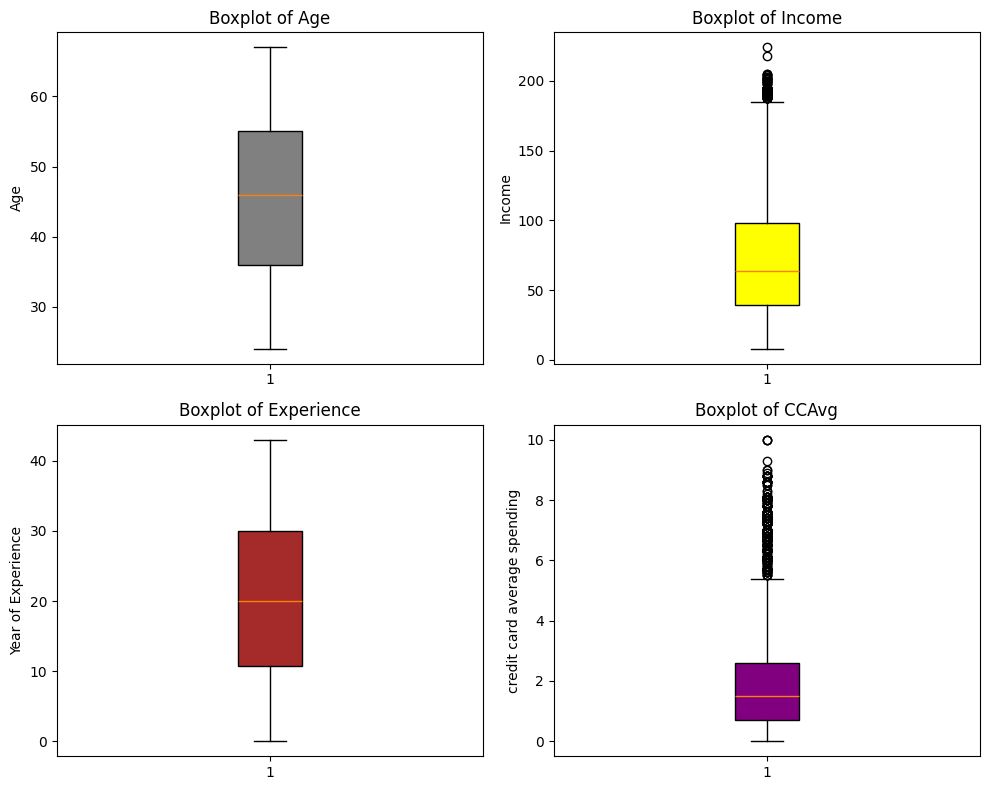

In [324]:
# Create a figure and axis object with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Plot boxplot for var1
axes[0, 0].boxplot(bankloan['Age'], patch_artist=True, boxprops=dict(facecolor='grey', color='black'))
axes[0, 0].set_title('Boxplot of Age')
axes[0, 0].set_ylabel('Age')

# Plot boxplot for var2
axes[0, 1].boxplot(bankloan['Income'], patch_artist=True, boxprops=dict(facecolor='yellow', color='black'))
axes[0, 1].set_title('Boxplot of Income')
axes[0, 1].set_ylabel('Income')

# Plot boxplot for var3
axes[1, 0].boxplot(bankloan['Experience'], patch_artist=True, boxprops=dict(facecolor='brown', color='black'))
axes[1, 0].set_title('Boxplot of Experience')
axes[1, 0].set_ylabel('Year of Experience')

# Plot boxplot for var4
axes[1, 1].boxplot(bankloan['CCAvg'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
axes[1, 1].set_title('Boxplot of CCAvg')
axes[1, 1].set_ylabel('credit card average spending')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<p>We can conclude, there are outliers on:</p>
<ul>
<li>Income variable</li>
<li>CCAvg variable</li>
</ul>

<h2>Step 3: Plot Violin Plot to check the distribution of the data</h2>

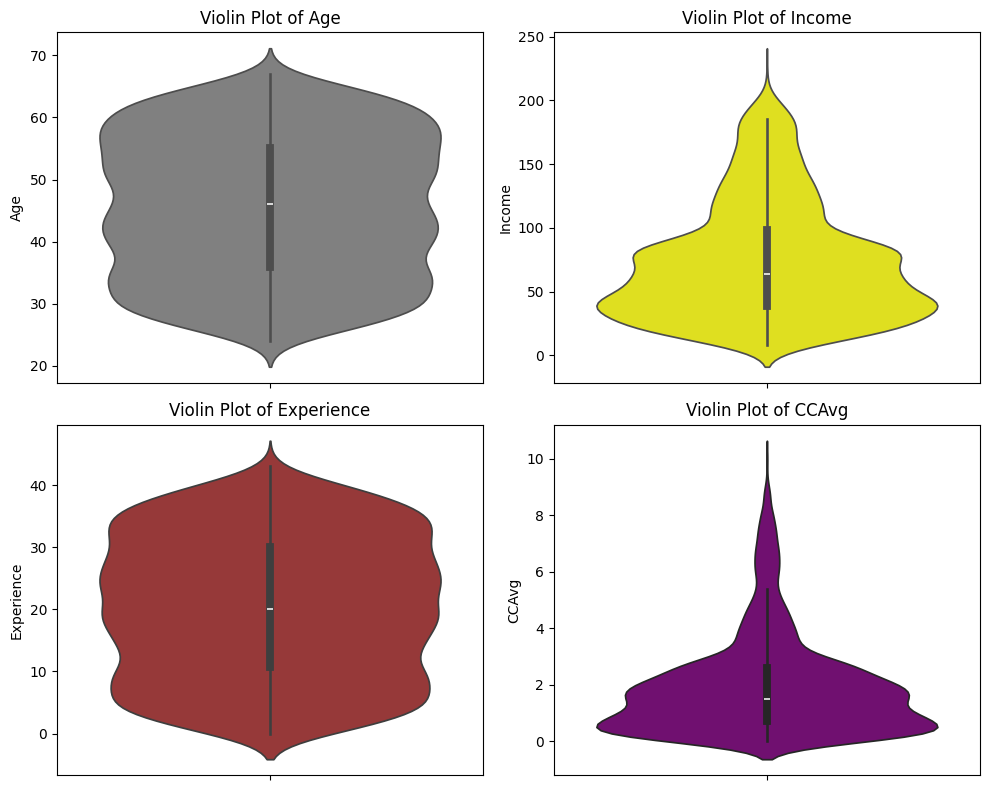

In [325]:
# Create a figure and axis object with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Plot violin plot for var1
sb.violinplot(ax=axes[0, 0], data=bankloan, y='Age', color='grey')
axes[0, 0].set_title('Violin Plot of Age')

# Plot violin plot for var2
sb.violinplot(ax=axes[0, 1], data=bankloan, y='Income', color='yellow')
axes[0, 1].set_title('Violin Plot of Income')

# Plot violin plot for var3
sb.violinplot(ax=axes[1, 0], data=bankloan, y='Experience', color='brown')
axes[1, 0].set_title('Violin Plot of Experience')

# Plot violin plot for var4
sb.violinplot(ax=axes[1, 1], data=bankloan, y='CCAvg', color='purple')
axes[1, 1].set_title('Violin Plot of CCAvg')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<h2>Step 4: Removing outliers in the data</h2>

In [ ]:
#define a function to deal with outliers
print('shape before removing outliers:', bankloan.shape)
def remove_outliers(df, columns, threshold = 1.5):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        df = df[(df[column] >= q1 - threshold * (q3 - q1)) & (df[column] <= q3 + threshold * (q3 - q1))]
    return df

columns = ['Age', 'Experience', 'Income', 'CCAvg']
row = bankloan.shape[0]
diff = np.inf
while diff > 0:
    bankloan = remove_outliers(bankloan, columns)
    diff = row - bankloan.shape[0]
    row = bankloan.shape[0]
print('shape after removing outliers:', bankloan.shape)


shape before removing outliers: (4948, 13)
shape after removing outliers: (4334, 13)


<h2>Step 5: Box Plot for the 5 point summary after removing the outliers</h2>

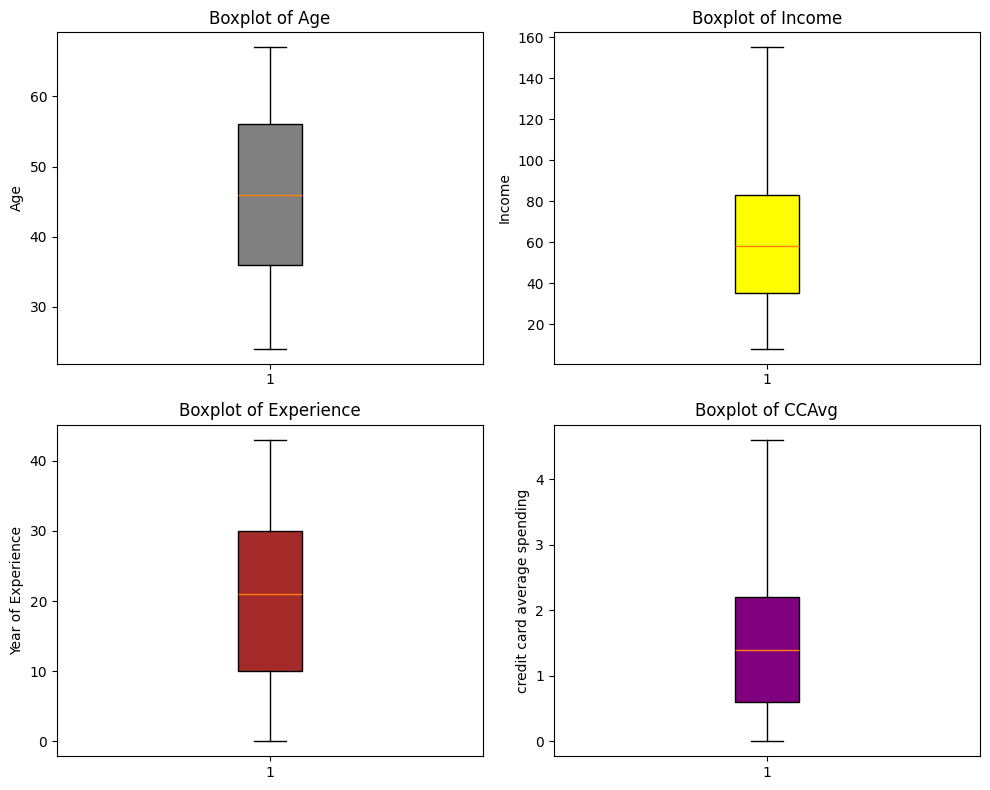

In [327]:
# Create a figure and axis object with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Plot boxplot for var1
axes[0, 0].boxplot(bankloan['Age'], patch_artist=True, boxprops=dict(facecolor='grey', color='black'))
axes[0, 0].set_title('Boxplot of Age')
axes[0, 0].set_ylabel('Age')

# Plot boxplot for var2
axes[0, 1].boxplot(bankloan['Income'], patch_artist=True, boxprops=dict(facecolor='yellow', color='black'))
axes[0, 1].set_title('Boxplot of Income')
axes[0, 1].set_ylabel('Income')

# Plot boxplot for var3
axes[1, 0].boxplot(bankloan['Experience'], patch_artist=True, boxprops=dict(facecolor='brown', color='black'))
axes[1, 0].set_title('Boxplot of Experience')
axes[1, 0].set_ylabel('Year of Experience')

# Plot boxplot for var4
axes[1, 1].boxplot(bankloan['CCAvg'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
axes[1, 1].set_title('Boxplot of CCAvg')
axes[1, 1].set_ylabel('credit card average spending')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<h2>Step 6: Violin Plot to check the distribution of the data after removing the outliers</h2>

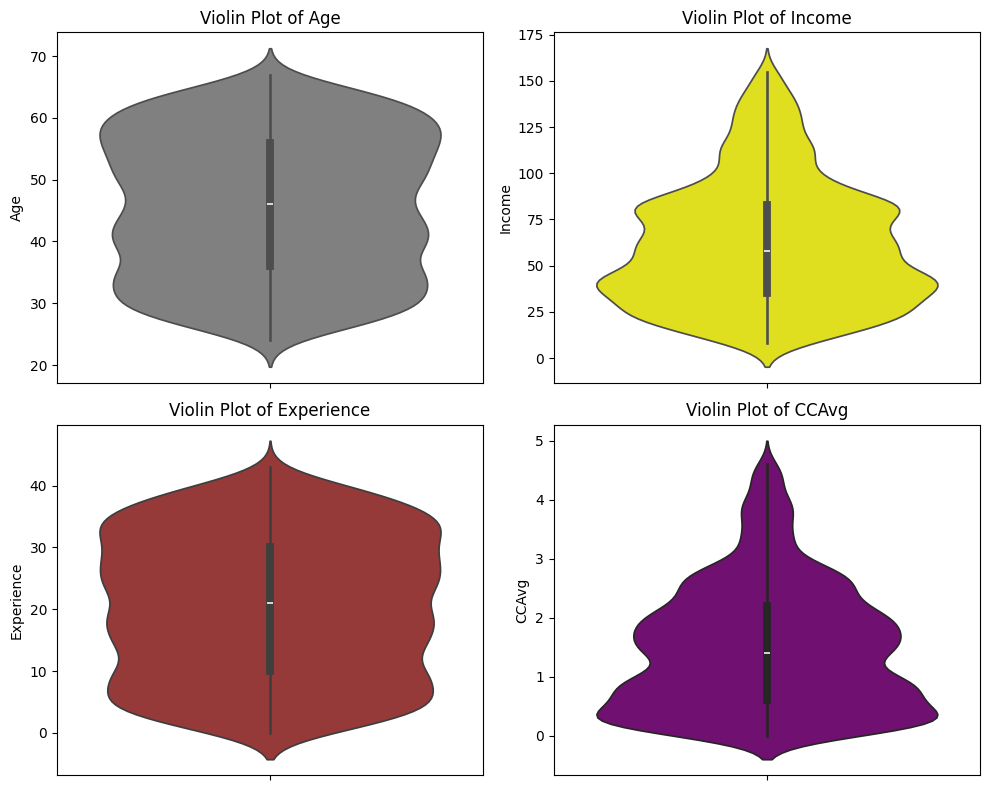

In [328]:
# Create a figure and axis object with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Plot violin plot for var1
sb.violinplot(ax=axes[0, 0], data=bankloan, y='Age', color='grey')
axes[0, 0].set_title('Violin Plot of Age')

# Plot violin plot for var2
sb.violinplot(ax=axes[0, 1], data=bankloan, y='Income', color='yellow')
axes[0, 1].set_title('Violin Plot of Income')

# Plot violin plot for var3
sb.violinplot(ax=axes[1, 0], data=bankloan, y='Experience', color='brown')
axes[1, 0].set_title('Violin Plot of Experience')

# Plot violin plot for var4
sb.violinplot(ax=axes[1, 1], data=bankloan, y='CCAvg', color='purple')
axes[1, 1].set_title('Violin Plot of CCAvg')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<h1>EDA on categorical columns</h1>
<p>Categorical variables:</p>
<ul>				
<li>ZIP Code</li>
<li>Family</li>
<li>Education</li>
<li>Personal Loan</li>
<li>Securities Account</li>
<li>CD Account</li>
<li>Online</li>
<li>CreditCard</li>
</ul>


<h2>Step 1: Categorical variables counts plot</h2>

C:\Users\mariah\AppData\Local\Temp\ipykernel_18172\3803724212.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(ax=ax, x=category, data=bankloan, palette='Set2', width=0.3)
C:\Users\mariah\AppData\Local\Temp\ipykernel_18172\3803724212.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')
C:\Users\mariah\AppData\Local\Temp\ipykernel_18172\3803724212.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(ax=ax, x=category, data=bankloan, palette='Set2', width=0.3)
C:\Users\mariah\AppData\Local\Temp\ipykernel_18172\3803724212.py:12: UserWarning

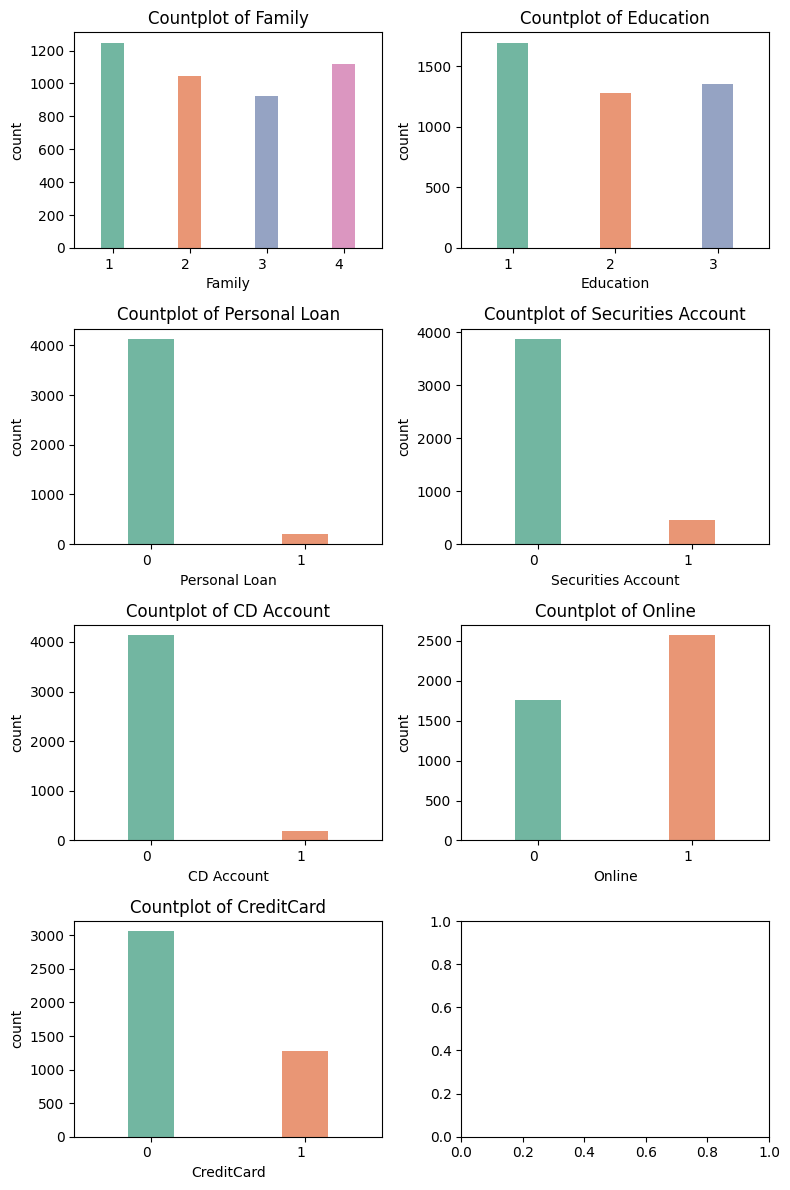

In [329]:
# Create a figure and axis object with 4 rows and 2 columns (4x2 grid)
fig, axes = plt.subplots(4, 2, figsize=(8, 12))

# List of categorical variables for easy iteration
categories = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

# Loop to create a countplot for each categorical variable
for i, category in enumerate(categories):
    ax = axes[i // 2, i % 2]  # Determine position in the 4x2 grid
    sb.countplot(ax=ax, x=category, data=bankloan, palette='Set2', width=0.3)
    ax.set_title(f'Countplot of {category}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<h2>Step 2: Filter categorical variables for only those who previously took a loan</h2>

C:\Users\mariah\AppData\Local\Temp\ipykernel_18172\1653814099.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(ax=ax, x=category, data=data, palette='Set2', width=0.3)
C:\Users\mariah\AppData\Local\Temp\ipykernel_18172\1653814099.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')
C:\Users\mariah\AppData\Local\Temp\ipykernel_18172\1653814099.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(ax=ax, x=category, data=data, palette='Set2', width=0.3)
C:\Users\mariah\AppData\Local\Temp\ipykernel_18172\1653814099.py:13: UserWarning: set_ti

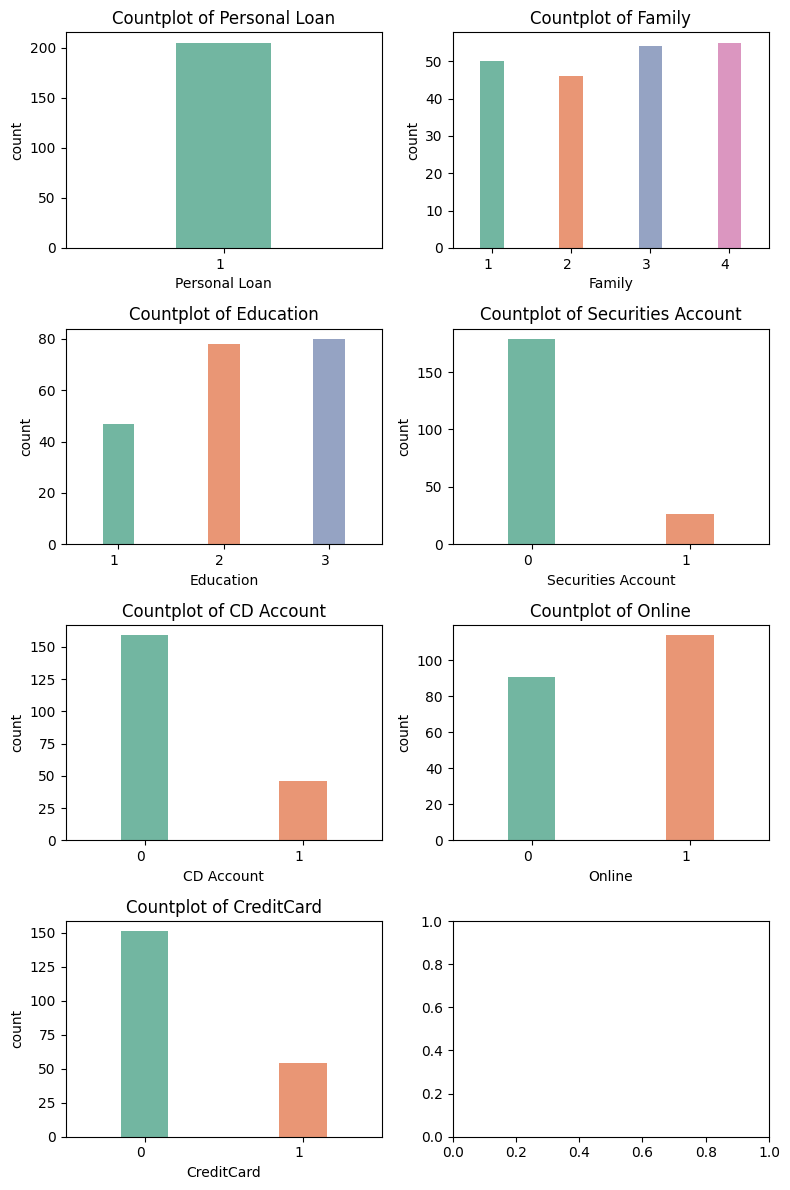

In [330]:
# Create a figure and axis object with 4 rows and 2 columns (4x2 grid)
fig, axes = plt.subplots(4, 2, figsize=(8, 12))

# List of categorical variables for easy iteration
categories = ['Personal Loan','Family', 'Education','Securities Account', 'CD Account', 'Online', 'CreditCard']

# Loop to create a countplot for each categorical variable
data = bankloan[bankloan['Personal Loan']==1]
for i, category in enumerate(categories):
    ax = axes[i // 2, i % 2]  # Determine position in the 4x2 grid
    sb.countplot(ax=ax, x=category, data=data, palette='Set2', width=0.3)
    ax.set_title(f'Countplot of {category}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<p>We can conclude, among the costumenrs who previously taking a loan:<p>
<ul>
<li>75% of them have education class 2 or 3.</li>
<li>More than 60% of them have online service</li>
<li>If the costumer take a loan, then he(she) has education class 2 or 3 with 80% of confidence. Attention: the reverse is false!</li>
</ul>

<h2>Step 3: We can check the relationship using the crosstab function()</h2>

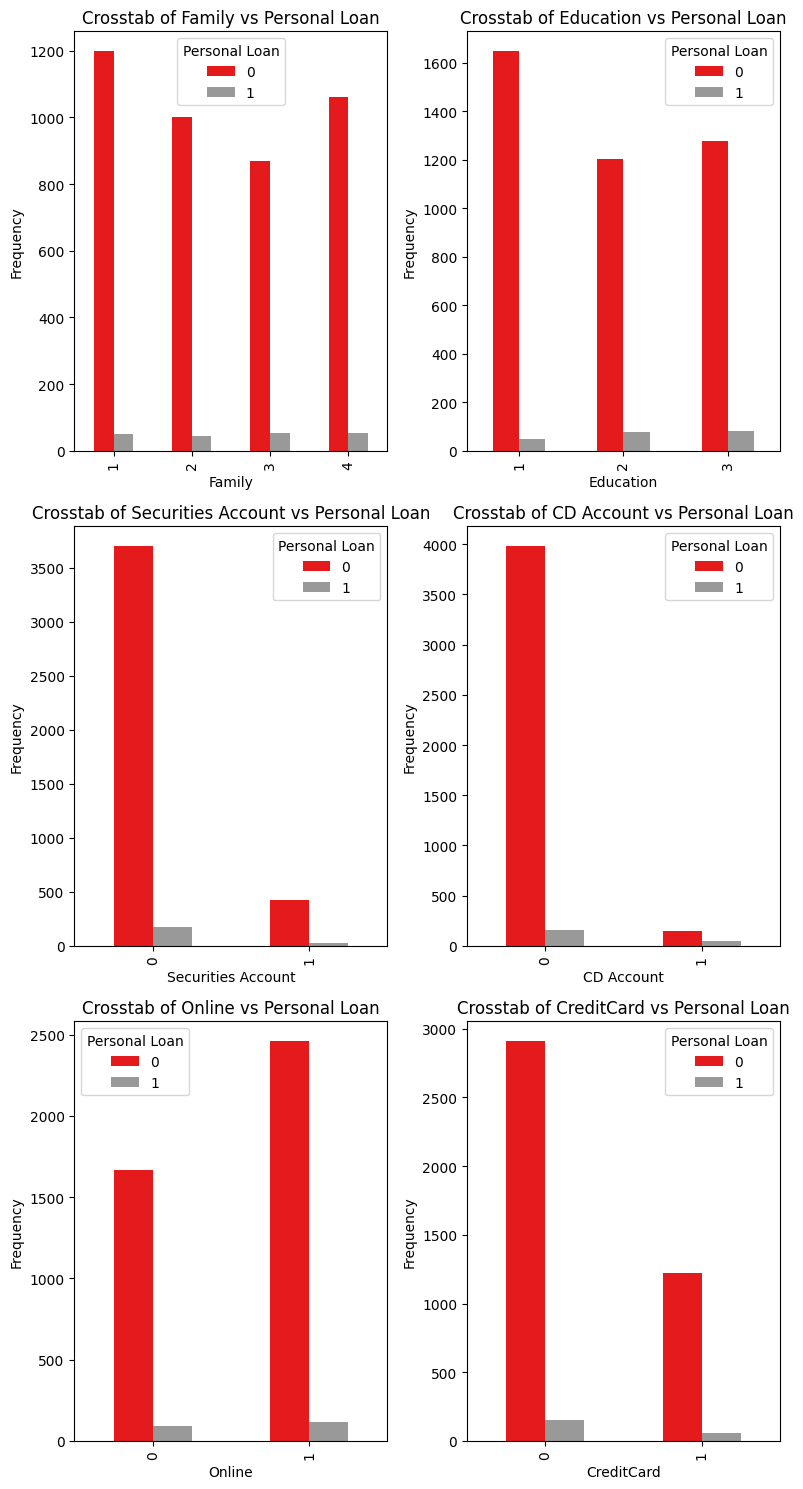

In [331]:
# Create a figure and axis object with 3 rows and 2 columns (3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(8, 15))

# List of categorical variables (excluding the target category)
categories = ['Family', 'Education','Securities Account', 'CD Account', 'Online', 'CreditCard']

# the target category
target_category = 'Personal Loan'

# Loop to create a crosstab for each categorical variable against the target variable
for i, category in enumerate(categories):
    ax = axes[i // 2, i % 2]  # Determine position in the 3x2 grid
    crosstab = pd.crosstab(bankloan[category], bankloan[target_category])  # Calculate crosstab
    
    # Plot the crosstab as a bar plot or heatmap
    crosstab.plot(kind='bar', ax=ax, colormap='Set1', width=0.5)
    
    # Set plot titles and labels
    ax.set_title(f'Crosstab of {category} vs {target_category}')
    ax.set_xlabel(category)
    ax.set_ylabel('Frequency')
    ax.legend(title=target_category)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<h1>Relationships between features</h1>

<h2>Step 1: Plot Correlation between Features</h2>

<Axes: >

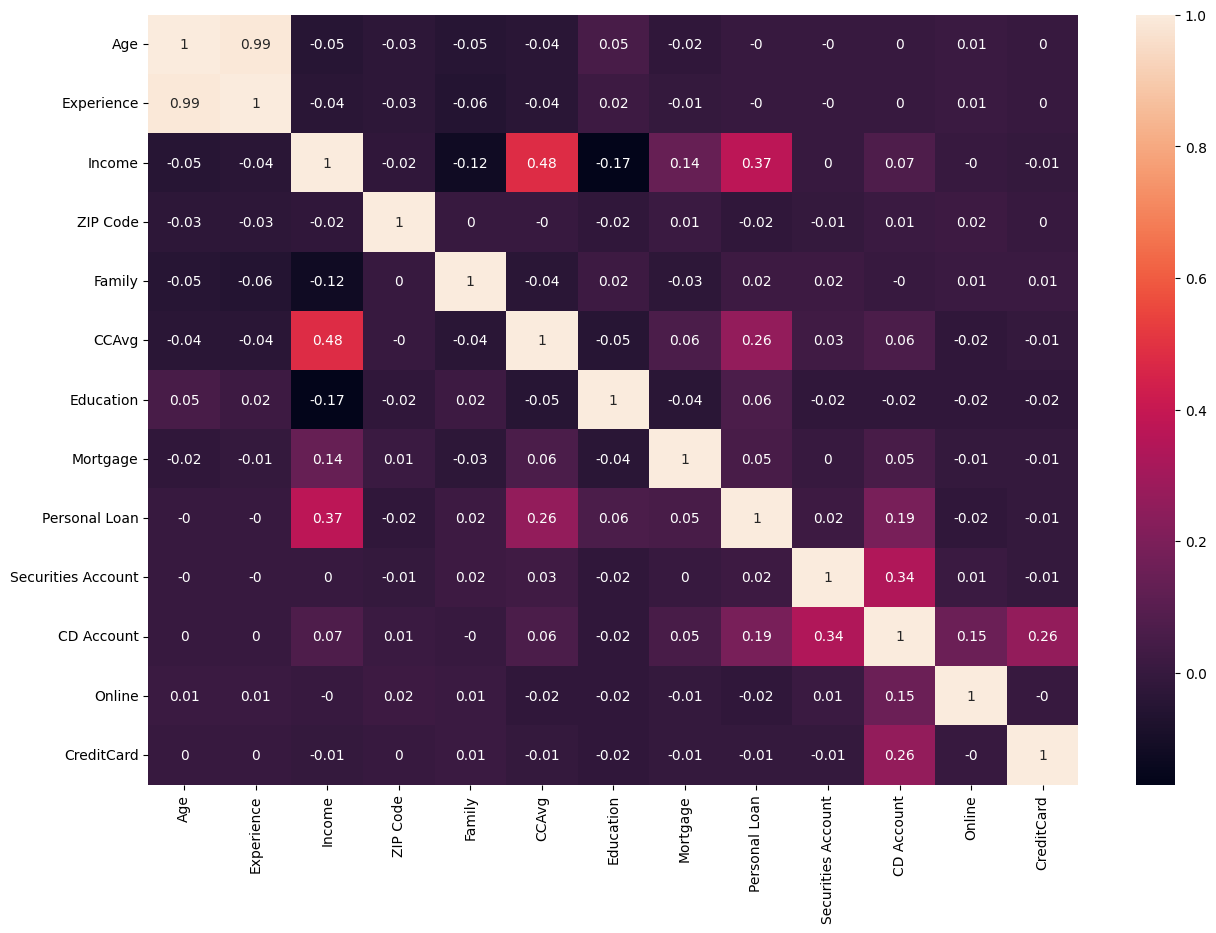

In [332]:
#figure size
fig = plt.figure(figsize = (15, 10))

#plot correlation between variables
sb.heatmap(bankloan.corr().round(2), annot = True)

<p>We can conclude:</p>
<ul>
<li>the combinaison of Income, Credit card Average spending and CD account have more impact on the Personal Loan decision.</li> 
<li>hence, we can make class prediction of loan based on these three factors.</li>
</ul>

<h2>Step 2: Pairplot the relationships between numerical columns</h2>
<p>Numerical variables:<p>
<ul>
<li>Age</li>
<li>Experience</li>
<li>Income</li>
<li>CCAvg</li>
</ul>

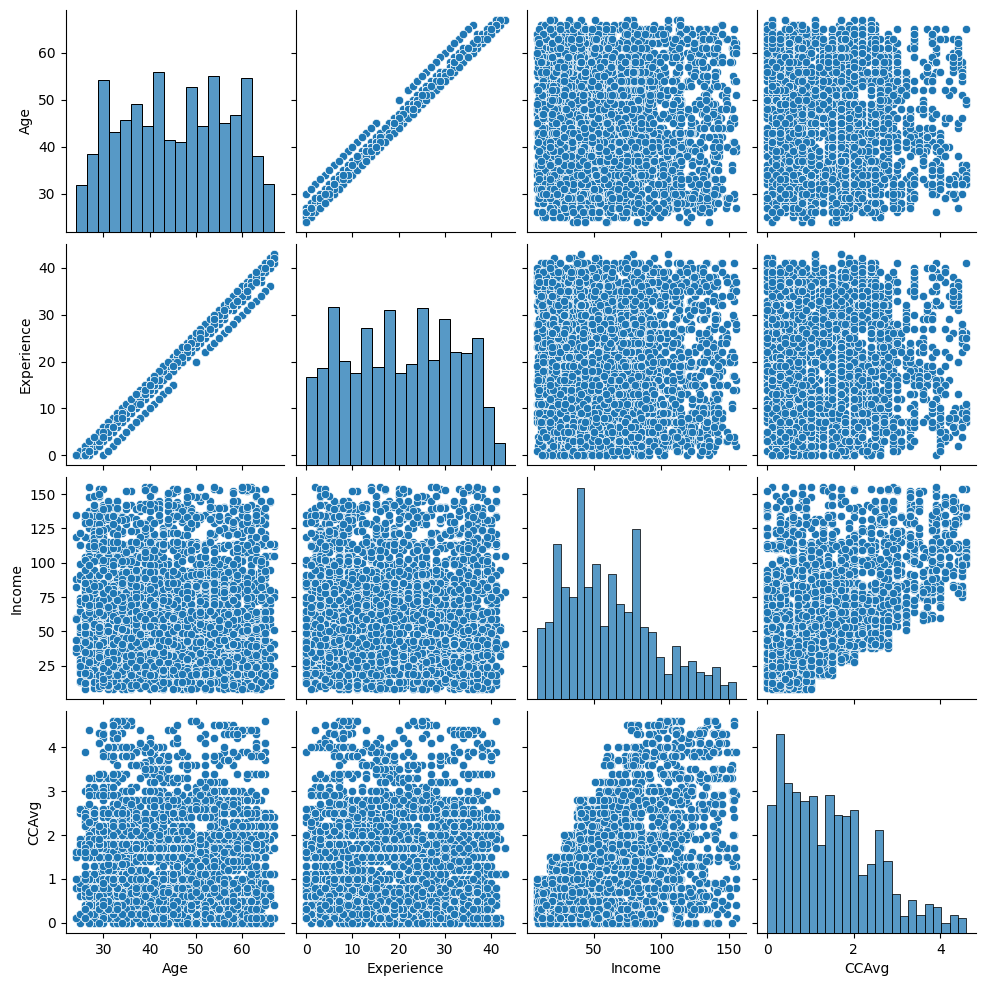

In [333]:
# Check correlation using pairplot
sb.pairplot(bankloan[['Age', 'Experience', 'Income', 'CCAvg']]);

<p>Note:</p>
<ul>
<li>The diagonals are histograms while the rest is scatter plot to describe how the features change together.</li>
<li>We conclude the direct strong relationship between age and experience.</li>
</ul>